In [ ]:
################## Question 1 ###################

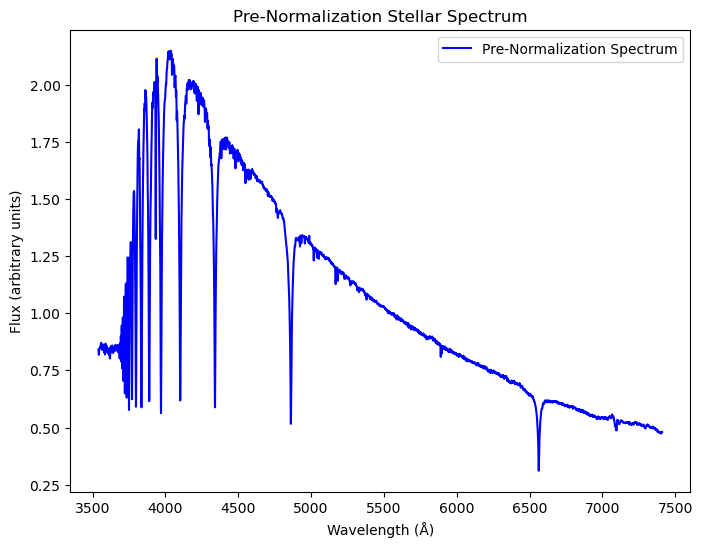

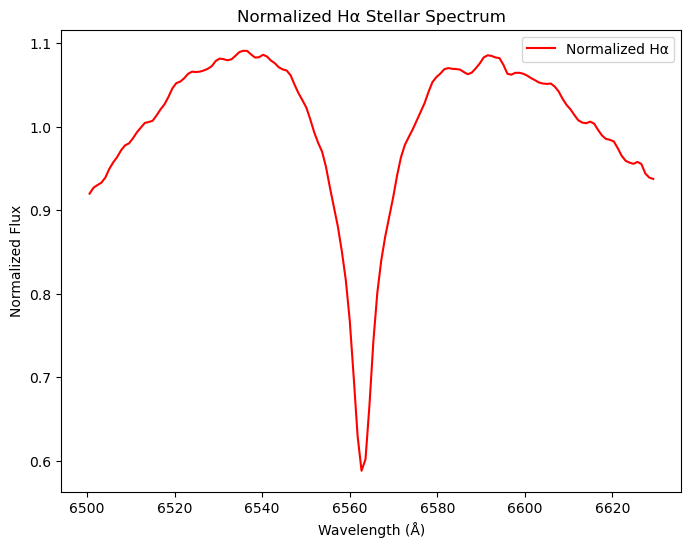

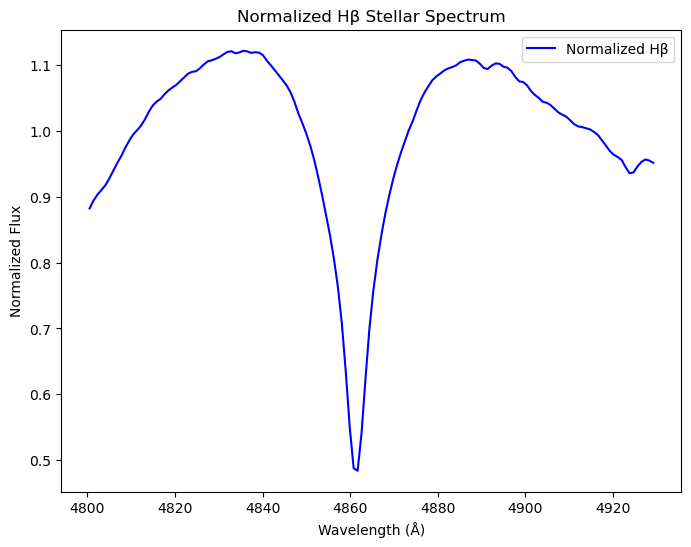

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Oscillator strengths of line transitions (how likely it is for a transition to ocuurr)
H_alpha = 0.6407
H_beta = 0.1193

# Uploading data file containing stellar spectra wavelength and flux
# First column: Wavelength (in Angstroms)
# Second column: Flux (arbitrary units)
data = np.loadtxt('star1.txt')
wavelength = data[:, 0] # extract wavelegnth values from first collumn
flux = data[:, 1]       # extract flux values from second collumn


#Plotting spectrum pre-normalization
plt.figure(figsize=(8,6))
plt.plot(wavelength, flux, label= 'Pre-Normalization Spectrum', color= 'blue') #Plotting original spectrum
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux (arbitrary units)')
plt.title('Pre-Normalization Stellar Spectrum')
plt.legend()
plt.show()

# Define the wavelength ranges for the Hα and Hβ absorption lines to analyze these specific 
# -- absorption features and normalize them.
# The goal is to select a region around each absorption line, including the continuum
# -- but avoiding any other absorption lines in the vicinity.

# Known center wavelengths of the hydrogen aborbtion lines:
H_alpha_center = 6563  # Å
H_beta_center = 4861   # Å

# Define ranges around each absorbtion line to capture aborption feautres and continuum, but avoiding 
# -- data that could interfere with the fit
wavelength_H_alpha_range = (6500, 6630)  # Region around Hα
wavelength_H_beta_range = (4800, 4930)   # Region around Hβ

# Create masks to filter out unessecary data outside the desire ranges defined above.
mask_H_alpha = (wavelength >= wavelength_H_alpha_range[0]) & (wavelength <= wavelength_H_alpha_range[1])
mask_H_beta = (wavelength >= wavelength_H_beta_range[0]) & (wavelength <= wavelength_H_beta_range[1])

# Apply the masks to extract the relevant wavelength and flux values for each region
wavelength_H_alpha = wavelength[mask_H_alpha]
flux_H_alpha = flux[mask_H_alpha]
wavelength_H_beta = wavelength[mask_H_beta]
flux_H_beta = flux[mask_H_beta]

# Fit a polynomial to the stellar continuum around each absorption line representing the star’s light 
# -- without the absorption.
# Fit a polynomial to approximate this continuum so we can use it for normalization.
poly_H_alpha = np.polyfit(wavelength_H_alpha, flux_H_alpha, 3)  # Fit polynomial for Hα
poly_H_beta = np.polyfit(wavelength_H_beta, flux_H_beta, 3)     # Fit polynomial for Hβ

# Evaluate the polynomial fit to get the estimated continuum values
# Gives a model of the continuum, and then we divide by it to normalize.
continuum_H_alpha = np.polyval(poly_H_alpha, wavelength_H_alpha)
continuum_H_beta = np.polyval(poly_H_beta, wavelength_H_beta)

# Normalizing the polynomial
normalized_flux_H_alpha = flux_H_alpha / continuum_H_alpha
normalized_flux_H_beta = flux_H_beta / continuum_H_beta

import matplotlib.pyplot as plt


# Normalized Hα Spectrum Plot
plt.figure(figsize=(8, 6))  # Create a new figure for Hα
plt.plot(wavelength_H_alpha, normalized_flux_H_alpha, label='Normalized Hα', color='red')  # Plot the Hα spectrum in red
plt.xlabel('Wavelength (Å)')  # Label x-axis as Wavelength in Angstroms
plt.ylabel('Normalized Flux')  # Label y-axis as Normalized Flux
plt.title('Normalized Hα Stellar Spectrum')  # Title for the Hα plot
plt.legend()  # Display the legend
plt.show()  # Display the Hα plot

# Normalized Hβ Spectrum Plot
plt.figure(figsize=(8, 6))  # Create a new figure for Hβ
plt.plot(wavelength_H_beta, normalized_flux_H_beta, label='Normalized Hβ', color='blue')  # Plot the Hβ spectrum in blue
plt.xlabel('Wavelength (Å)')  # Label x-axis as Wavelength in Angstroms
plt.ylabel('Normalized Flux')  # Label y-axis as Normalized Flux
plt.title('Normalized Hβ Stellar Spectrum')  # Title for the Hβ plot
plt.legend()  # Display the legend
plt.show()  # Display the Hβ plot


These normalization plots correspond to the two rightmost dips in the spectral data: the H-beta line and the H-alpha line, presented in that order. The first plot takes into account the full range of light fluctuations and absorption effects caused by the intervening gas. By normalizing these plots, we transform the jagged data into a smoother curve, which allows us to apply a polynomial fit. This smoothing process makes it easier to accurately measure key properties such as the area under the absorption lines. Specifically, it enables us to more precisely determine the equivalent width (EW), a critical measure in spectral analysis.

The final two plots illustrate the data used in the following code to calculate the equivalent width. These plots serve as the basis for the calculations used to determine the EW, offering a clearer, more manageable dataset from which we can derive meaningful measurements of the absorption features.

In [55]:
# Computation for Equivalent Width (EW)

# Compute small wavelength steps (Δλ)
delta_lambda_H_alpha = np.diff(wavelength_H_alpha)  # Differences between consecutive wavelength points
delta_lambda_H_beta = np.diff(wavelength_H_beta)

# Compute integrand: (1 - Fλ / F_continuum) at each point
integrand_H_alpha = np.abs(1 - normalized_flux_H_alpha[:-1])  # Skip last value to match delta_lambda size
integrand_H_beta = np.abs(1 - normalized_flux_H_beta[:-1])

# Compute the sum for the integral approximation
W_H_alpha = np.sum(integrand_H_alpha * delta_lambda_H_alpha)
W_H_beta = np.sum(integrand_H_beta * delta_lambda_H_beta)

print(f"Equivalent Width of Hα: {W_H_alpha:.3f} Å")
print(f"Equivalent Width of Hβ: {W_H_beta:.3f} Å")


Equivalent Width of Hα: 8.798 Å
Equivalent Width of Hβ: 11.728 Å


By calculating the equivalent width, we account for both the depth and width of the absorption line, allowing for a more accurate measurement of its area. This eliminates the assumption that a narrow line has a small area (as it may be very deep) or that a wide line necessarily has a larger area (as it may be very shallow in comparison)

In [56]:
# Estimation for the apparent column density of each line
column_density_constant = 1.13e12 # cm^-2

# Compute column densities using previously defined variables
N_H_alpha = column_density_constant * (W_H_alpha / (H_alpha * H_alpha_center))
N_H_beta = column_density_constant * (W_H_beta / (H_beta * H_beta_center))

# Compute column density ratio
column_density_ratio = N_H_alpha / N_H_beta

# Print results
print('Apparent Column Density for Hα:', f'{N_H_alpha:.2f}', 'cm⁻²') 
print('Apparent Column Density for Hβ:', f'{N_H_beta:.2f}', 'cm⁻²')
print('Ratio N_Hα / N_Hβ:', f'{column_density_ratio:.3f}')

Apparent Column Density for Hα: 2364193486.89 cm⁻²
Apparent Column Density for Hβ: 22853152207.18 cm⁻²
Ratio N_Hα / N_Hβ: 0.103


Discuss which regime of the curve of growth that these two stellar spectral lines fall into and whether or not your column densities rep- resent lower limits, upper limits, or just the measured values (i.e., not limits). And, what is the Hα to Hβ column density ratio that you pre- dict, i.e., NHα/NHβ?

Linear Regime (Optically Thin, Weak Lines)
The absorption is weak, and the equivalent width is directly proportional to the column density.
Saturated Regime (Flat Part of the Curve)
Strong absorption causes the core of the line to saturate, meaning increasing column density does not significantly increase the equivalent width.
Damping Regime (Lorentzian Wings Dominate)
Very high column densities cause broadening due to damping wings, making the line profile wider.

With these definitions we can determine that Hα is in the saturated regime, leading to an underestimated column density (a lower limit). Hβ is less saturated and closer to the linear regime, making its column density more accurate, but it may still be slightly underestimated.
The measured ratio with known true values:
𝑁𝐻𝛼/𝑁𝐻𝛽 = 0.103
Code calulated ratio:
NHα/NHβ =0.103 is much lower than the predicted theoretical ratio (~3.5), confirming Hα’s saturation.
If both lines were in the optically thin regime, we would expect a ratio of ~3.5, meaning the observed values suggest saturation effects are significant.

In [57]:
################## Question 2 ###################

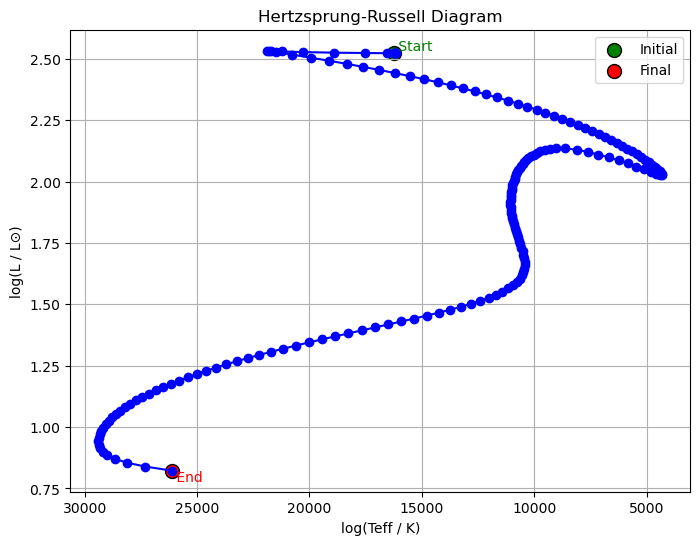

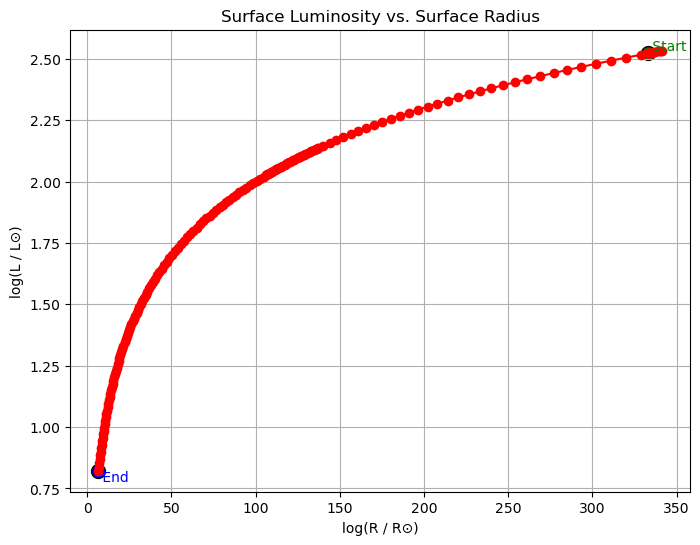

In [58]:
# Retrieve data from Dr. Kat's simulation
data = np.loadtxt('history.data', skiprows=6) # Load the 'history.data' file while skipping the first 6 rows.

# Extract relevant columns
log_Teff = data[:, 35]   # log(Teff / K --36th column 
log_L = data[:, 37]      # log(L / L⊙) (surface luminosity) --38th column
log_R = data[:, 38]      # log(R / R⊙) (stellar radius) --39th column

# Identify the initial and final time steps
log_Teff_initial, log_L_initial = log_Teff[0], log_L[0]   # First recorded state
log_Teff_final, log_L_final = log_Teff[-1], log_L[-1]     # Last recorded state

log_R_initial, log_L_initial = log_R[0], log_L[0]   # First recorded state for R-L plot
log_R_final, log_L_final = log_R[-1], log_L[-1]     # Last recorded state for R-L plot


# HR Diagram (log L vs. log Teff, reversed x-axis)
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(log_Teff, log_L, color='blue', marker='o', linestyle='-')  # Plot data points
# Label initial and final positions
plt.scatter(log_Teff_initial, log_L_initial, color='green', label='Initial', edgecolors='black', s=100)
plt.scatter(log_Teff_final, log_L_final, color='red', label='Final', edgecolors='black', s=100)
# Annotate points with text labels
plt.text(log_Teff_initial, log_L_initial, ' Start', verticalalignment='bottom', fontsize=10, color='green')
plt.text(log_Teff_final, log_L_final, ' End', verticalalignment='top', fontsize=10, color='red')
plt.xlabel('log(Teff / K)')
plt.ylabel('log(L / L⊙)')
plt.title('Hertzsprung-Russell Diagram')
plt.gca().invert_xaxis()  # Reverse the x-axis for the HR diagram so temperatures are on the left
plt.grid(True)
plt.legend()  # Show legend for initial and final positions
plt.show

# Luminosity vs. Radius (log L vs. log R)
# This plot shows how the surface luminosity of a star changes with its radius.
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(log_R, log_L, color='red', marker='o', linestyle='-')  # Plot data points
# Label initial and final positions
plt.scatter(log_R_initial, log_L_initial, color='green', label='Initial', edgecolors='black', s=100)
plt.scatter(log_R_final, log_L_final, color='blue', label='Final', edgecolors='black', s=100)
# Annotate points with text labels
plt.text(log_R_initial, log_L_initial, ' Start', verticalalignment='bottom', fontsize=10, color='green')
plt.text(log_R_final, log_L_final, ' End', verticalalignment='top', fontsize=10, color='blue')
plt.xlabel('log(R / R⊙)')
plt.ylabel('log(L / L⊙)')
plt.title('Surface Luminosity vs. Surface Radius')
plt.grid(True)
plt.show()

Describe how the temperature and luminosity of the surface of the star is related to the size of 
the star as it changes position on this diagram.

Between the two graphs we can determine that in the early stages of the stars life, it is hot, luminous, and massive most likeley a star much like our sun, as it occupies the upper left region of the H-R diagram. The second plot correlates to high-luminosity, large-radius region, confirming that it is a massive star. As the star evolves, it moves rightward on the H-R diagram, indicating cooling. The second diagram shows a decreasing radius and decreasing luminosity, meaning the star is contracting. As the star begins to die, it ends it evolutionary journey with a lower temperature and luminosity, the second diagram confirming that it now has a much smaller radius. 

This behavior follows that of a white dwarf, being very small and dim, which is a very possible outcome of a star like our sun.

The two graphs confirm the known fact that a decrease in radius correlates with a decrease in luminosity, and as the star evolves, its temperature and size decrease together. This further confirms contraction and cooling as the dominant evolutionary process in the final stages.

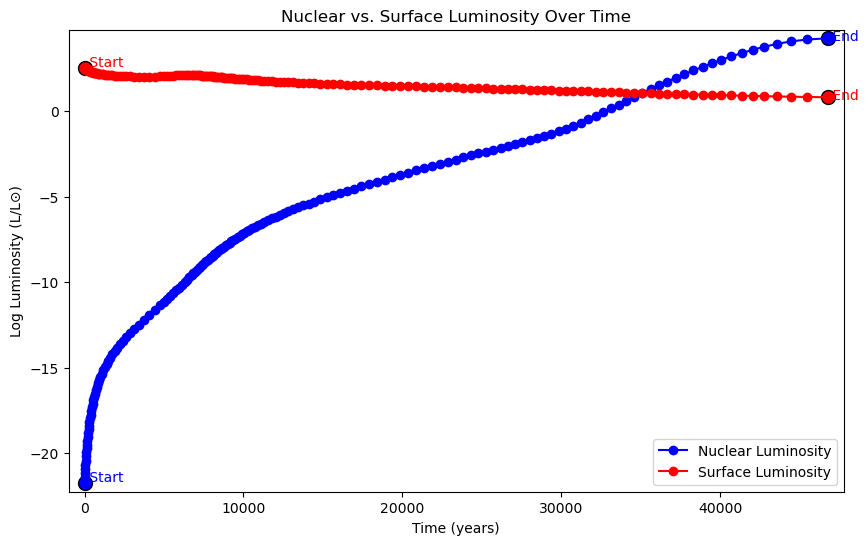

In [61]:
# Plot with luminosity of the star's core due to nuclear fusion and luminosity of the light at its surface

# Extract time (star_age), assuming it's in the 2nd column
time = data[:, 1]  # star age 

# Extract nuclear luminosity (logarithmic), from column 34 
log_L_nuclear = data[:, 33]  # Lnuclear/L⊙ 

# Extract surface luminosity (logarithmic), from column 37 
log_L_surface = data[:, 37]  # Lsurface/L⊙ 


# Identify the initial and final time steps for both curves
time_initial = time[0]
time_final = time[-1]
# Initial and final nuclear luminosity values
log_L_nuclear_initial = log_L_nuclear[0]
log_L_nuclear_final = log_L_nuclear[-1]
# Initial and final surface luminosity values
log_L_surface_initial = log_L_surface[0]
log_L_surface_final = log_L_surface[-1]

import matplotlib.pyplot as plt

# Create a plot of nuclear and surface luminosity vs. time
plt.figure(figsize=(10, 6))
# Plot the nuclear luminosity curve 
plt.plot(time, log_L_nuclear, color='blue', marker='o', linestyle='-', label='Nuclear Luminosity')
# Plot the surface luminosity curve 
plt.plot(time, log_L_surface, color='red', marker='o', linestyle='-', label='Surface Luminosity')
plt.xlabel("Time (years)")
plt.ylabel("Log Luminosity (L/L⊙)")
plt.title("Nuclear vs. Surface Luminosity Over Time")
# Annotate initial and final positions
plt.scatter(time_initial, log_L_nuclear_initial, color='blue', edgecolors='black', s=100)
plt.scatter(time_final, log_L_nuclear_final, color='blue', edgecolors='black', s=100)
plt.text(time_initial, log_L_nuclear_initial + 0.1, ' Start', fontsize=10, color='blue')
plt.text(time_final, log_L_nuclear_final - 0.1, ' End', fontsize=10, color='blue')

plt.scatter(time_initial, log_L_surface_initial, color='red', edgecolors='black', s=100)
plt.scatter(time_final, log_L_surface_final, color='red', edgecolors='black', s=100)
plt.text(time_initial, log_L_surface_initial + 0.1, ' Start', fontsize=10, color='red')
plt.text(time_final, log_L_surface_final - 0.1, ' End', fontsize=10, color='red')

# Adjust axes limits
plt.ylim(log_L_nuclear.min() - 0.5, log_L_nuclear.max() + 0.5)
plt.xlim(time.min() - 1000, time.max() + 1000)
# Show the legend
plt.legend()
plt.show()


Based on this figure, how is the star evolving? E.g., is it just sitting on the main sequence, is in the process of forming and traveling to the main se- quence, is the star dying, or does this simulation include more than just one of these example scenarios. Be sure to explain.

This simulation likely captures more than one phase of stellar evolution. The star appears to be evolving off the main sequence and toward its later life stages, which would follow the previous graphs and my interpretations of its evoltion leading to a white dwarf. The drastic change in the blue curve suggests that the star is undergoing significant structural changes, (radius shrinking, and luminosity lowering) which may indicate the end stages of its life cycle, possibly leading to a compact remnant (white dwarf as previosuly mentioned).